Работу выполнил Сорокин Андрей, студент группы ИУ5-64б

Вариант 19, задание 3, датасет 3. 

**Задание** Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему? Для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)"

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('marvel-wikia-data.csv', sep = ',')

In [3]:
data.shape

(16376, 13)

In [4]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 16376


In [5]:
# типы колонок
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [6]:
# Первые 5 строк датасета
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [7]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка APPEARANCES. Тип данных float64. Количество пустых значений 1096, 6.69%.
Колонка Year. Тип данных float64. Количество пустых значений 815, 4.98%.


Выполним масштабирование колонки "Appearances" - кол-во появлений персонажей. Будем использовать метод MinMax

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [9]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['APPEARANCES']])

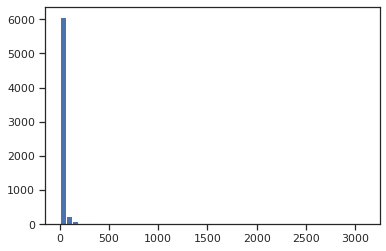

In [12]:
plt.hist(data['APPEARANCES'], 50)
plt.show()

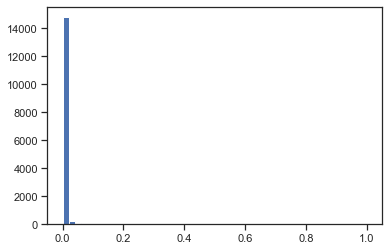

In [10]:
plt.hist(sc1_data, 50)
plt.show()

Выполним преобразование категориальных признаков в количественные

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [12]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ID. Тип данных object. Количество пустых значений 3770, 23.02%.
Колонка ALIGN. Тип данных object. Количество пустых значений 2812, 17.17%.
Колонка EYE. Тип данных object. Количество пустых значений 9767, 59.64%.
Колонка HAIR. Тип данных object. Количество пустых значений 4264, 26.04%.
Колонка SEX. Тип данных object. Количество пустых значений 854, 5.21%.
Колонка GSM. Тип данных object. Количество пустых значений 16286, 99.45%.
Колонка ALIVE. Тип данных object. Количество пустых значений 3, 0.02%.
Колонка FIRST APPEARANCE. Тип данных object. Количество пустых значений 815, 4.98%.


Для преобразования возьмем колонку First APPEARANCE. Для этой колонки лучше всего использовать Label Encoding, так как это колонки отражают даты, то есть в них есть порядок. 

In [13]:
#Для начала заполним пропущенные данные 
cat_temp_data = data[['FIRST APPEARANCE']]
cat_temp_data.head()

,FIRST APPEARANCE
0,Aug-62
1,Mar-41
2,Oct-74
3,Mar-63
4,Nov-50


In [14]:
cat_temp_data['FIRST APPEARANCE'].unique()

array(['Aug-62', 'Mar-41', 'Oct-74', 'Mar-63', 'Nov-50', 'Nov-61',
       'May-62', 'Sep-63', nan, 'May-75', 'Sep-64', 'Apr-64', 'Jul-63',
       'Jun-65', 'Jan-62', 'Mar-64', 'May-63', 'Jun-63', 'Oct-68',
       'Jan-80', 'Mar-68', 'Feb-80', 'Feb-74', 'Jun-72', 'Oct-70',
       'Aug-67', 'Oct-65', 'Jul-62', 'Dec-76', 'Mar-66', 'Jul-64',
       'Oct-64', 'Nov-82', 'Jul-90', 'May-74', 'Jan-86', 'Nov-64',
       'Mar-69', 'Nov-44', 'Oct-39', 'Aug-49', 'Oct-76', 'Jan-79',
       'Dec-65', 'Sep-69', 'Jul-67', 'Oct-62', 'Feb-91', 'Dec-67',
       'Nov-68', 'Feb-77', 'Aug-72', 'May-89', 'Aug-65', 'Aug-75',
       'Mar-65', 'Aug-77', 'Aug-41', 'Jan-67', 'Sep-40', 'Apr-63',
       'Sep-76', 'Apr-78', 'Jun-71', 'Dec-70', 'May-84', 'Nov-86',
       'Nov-72', 'Dec-75', 'Jul-79', 'Jul-65', 'Apr-05', 'Jul-78',
       'Jan-73', 'Dec-45', 'Jun-84', 'May-85', 'Sep-86', 'Dec-64',
       'Dec-68', 'Nov-85', 'Apr-79', 'May-90', 'Mar-92', 'Feb-73',
       'Dec-73', 'Nov-62', 'Sep-88', 'Jul-75', 'Jan-78', 

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [16]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Aug-62'],
       ['Mar-41'],
       ['Oct-74'],
       ...,
       ['Jun-92'],
       ['Jun-92'],
       ['Jun-92']], dtype=object)

In [17]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Aug-62
1,Mar-41
2,Oct-74
3,Mar-63
4,Nov-50
...,...
16371,Jun-92
16372,Jun-92
16373,Jun-92
16374,Jun-92


In [18]:
cat_enc['c1'].unique()

array(['Aug-62', 'Mar-41', 'Oct-74', 'Mar-63', 'Nov-50', 'Nov-61',
       'May-62', 'Sep-63', 'Jun-92', 'May-75', 'Sep-64', 'Apr-64',
       'Jul-63', 'Jun-65', 'Jan-62', 'Mar-64', 'May-63', 'Jun-63',
       'Oct-68', 'Jan-80', 'Mar-68', 'Feb-80', 'Feb-74', 'Jun-72',
       'Oct-70', 'Aug-67', 'Oct-65', 'Jul-62', 'Dec-76', 'Mar-66',
       'Jul-64', 'Oct-64', 'Nov-82', 'Jul-90', 'May-74', 'Jan-86',
       'Nov-64', 'Mar-69', 'Nov-44', 'Oct-39', 'Aug-49', 'Oct-76',
       'Jan-79', 'Dec-65', 'Sep-69', 'Jul-67', 'Oct-62', 'Feb-91',
       'Dec-67', 'Nov-68', 'Feb-77', 'Aug-72', 'May-89', 'Aug-65',
       'Aug-75', 'Mar-65', 'Aug-77', 'Aug-41', 'Jan-67', 'Sep-40',
       'Apr-63', 'Sep-76', 'Apr-78', 'Jun-71', 'Dec-70', 'May-84',
       'Nov-86', 'Nov-72', 'Dec-75', 'Jul-79', 'Jul-65', 'Apr-05',
       'Jul-78', 'Jan-73', 'Dec-45', 'Jun-84', 'May-85', 'Sep-86',
       'Dec-64', 'Dec-68', 'Nov-85', 'Apr-79', 'May-90', 'Mar-92',
       'Feb-73', 'Dec-73', 'Nov-62', 'Sep-88', 'Jul-75', 'Jan-

In [19]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [20]:
le.classes_

array(['Apr-00', 'Apr-01', 'Apr-02', 'Apr-03', 'Apr-04', 'Apr-05',
       'Apr-06', 'Apr-07', 'Apr-08', 'Apr-09', 'Apr-10', 'Apr-11',
       'Apr-12', 'Apr-13', 'Apr-40', 'Apr-41', 'Apr-42', 'Apr-43',
       'Apr-44', 'Apr-45', 'Apr-46', 'Apr-48', 'Apr-49', 'Apr-50',
       'Apr-51', 'Apr-52', 'Apr-53', 'Apr-54', 'Apr-55', 'Apr-57',
       'Apr-58', 'Apr-60', 'Apr-61', 'Apr-62', 'Apr-63', 'Apr-64',
       'Apr-65', 'Apr-66', 'Apr-67', 'Apr-68', 'Apr-69', 'Apr-70',
       'Apr-71', 'Apr-72', 'Apr-73', 'Apr-74', 'Apr-75', 'Apr-76',
       'Apr-77', 'Apr-78', 'Apr-79', 'Apr-80', 'Apr-81', 'Apr-82',
       'Apr-83', 'Apr-84', 'Apr-85', 'Apr-86', 'Apr-87', 'Apr-88',
       'Apr-89', 'Apr-90', 'Apr-91', 'Apr-92', 'Apr-93', 'Apr-94',
       'Apr-95', 'Apr-96', 'Apr-97', 'Apr-98', 'Apr-99', 'Aug-00',
       'Aug-01', 'Aug-02', 'Aug-03', 'Aug-04', 'Aug-05', 'Aug-06',
       'Aug-07', 'Aug-08', 'Aug-09', 'Aug-10', 'Aug-11', 'Aug-12',
       'Aug-40', 'Aug-41', 'Aug-42', 'Aug-43', 'Aug-44', 'Aug-

In [21]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Для этой колонки однозначно не пододет One-Hot encoding, так как в данных изначально уже есть порядок и присутсует очень много уникальных значений. Для метода One-Hot encoding лучше подойжет колонка SEX 

In [22]:
#Для начала заполним пропущенные данные 
cat_temp_data2 = data[['SEX']]
cat_temp_data2.head()

,SEX
0,Male Characters
1,Male Characters
2,Male Characters
3,Male Characters
4,Male Characters


In [23]:
cat_temp_data2['SEX'].unique()

array(['Male Characters', 'Female Characters', 'Genderfluid Characters',
       'Agender Characters', nan], dtype=object)

In [24]:
# Импьютация наиболее частыми значениями
imp4 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp4 = imp4.fit_transform(cat_temp_data2)
data_imp4

array([['Male Characters'],
       ['Male Characters'],
       ['Male Characters'],
       ...,
       ['Male Characters'],
       ['Male Characters'],
       ['Male Characters']], dtype=object)

In [25]:
cat_enc4 = pd.DataFrame({'c2':data_imp4.T[0]})
cat_enc4

,c2
0,Male Characters
1,Male Characters
2,Male Characters
3,Male Characters
4,Male Characters
...,...
16371,Male Characters
16372,Male Characters
16373,Male Characters
16374,Male Characters


In [26]:
pd.get_dummies(cat_enc4).head()

,c2_Agender Characters,c2_Female Characters,c2_Genderfluid Characters,c2_Male Characters
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [27]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc4[['c2']])

In [28]:
cat_enc_ohe

<16376x4 sparse matrix of type '<class 'numpy.float64'>'
	with 16376 stored elements in Compressed Sparse Row format>

In [29]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]])

**Построение скрипичной диаграммы**

In [34]:
import seaborn as sns

<AxesSubplot:xlabel='Year'>

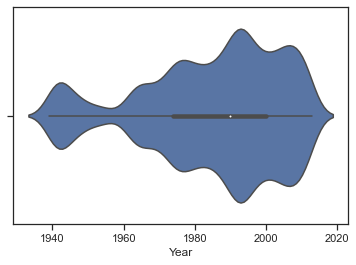

In [35]:
sns.violinplot(x=data['Year'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

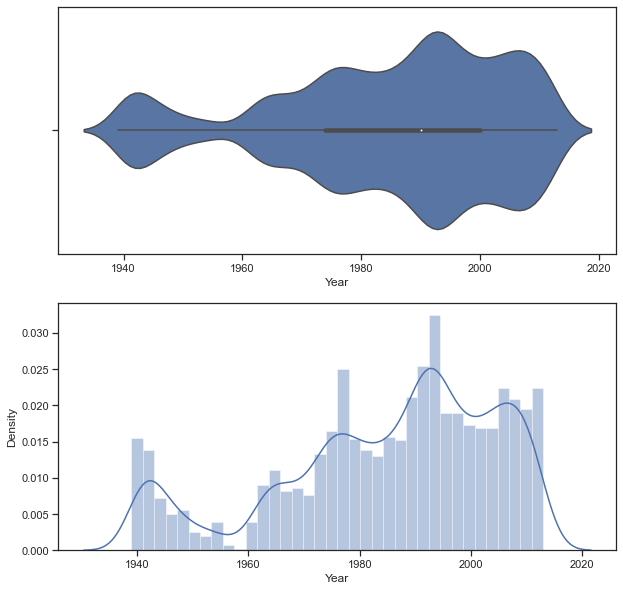

In [36]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['Year'])
sns.distplot(data['Year'], ax=ax[1])

<AxesSubplot:xlabel='SEX', ylabel='Year'>

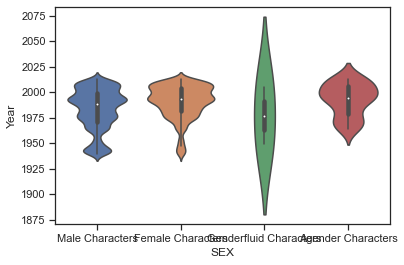

In [37]:
# Распределение параметра YEAR сгруппированные по SEX.
sns.violinplot(x='SEX', y='Year', data=data)